# SUV Car Purchase Prediction

In this project, we will build a model and on the basis of the model we will predict whether a Person will buy the SUV car or not.

First, we will import all the library a

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

With the help of this dataset, we will build a model that will help us to make prediction on further related datasets.

In [483]:
data=pd.read_csv(r'C:\Users\Shloka Daga SD03\dataset\suv_dataset.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [484]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [485]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [486]:
gender_map={'Male':1,'Female':0}
data['Gender']=data['Gender'].map(gender_map)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


[]

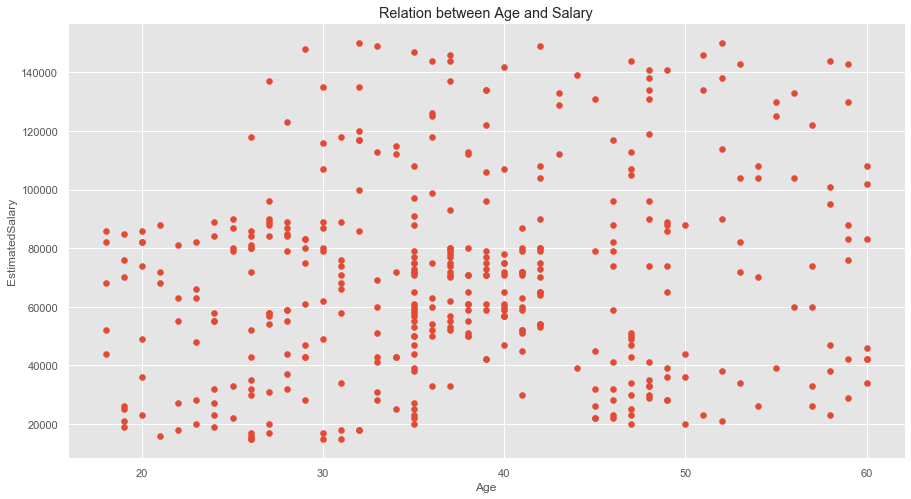

In [487]:
plt.figure(figsize=(15,8))
plt.scatter(x='Age',y='EstimatedSalary',data=data)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Relation between Age and Salary')
plt.plot()

## Heatmap

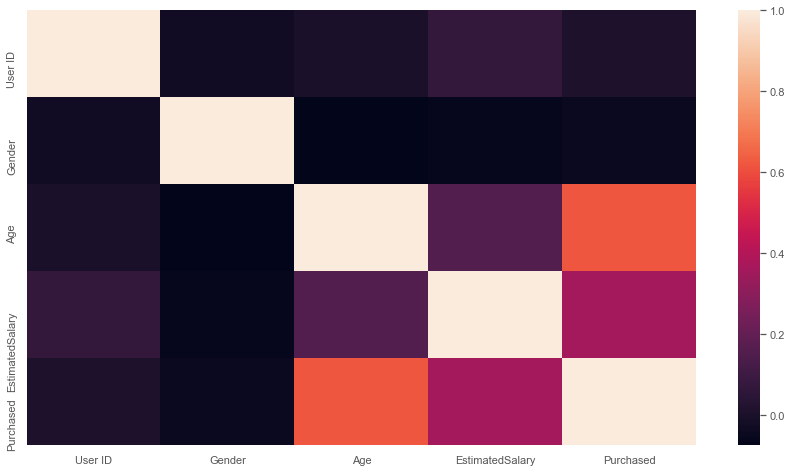

In [488]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())
plt.show()

In [489]:
X=data.iloc[:,[2,3]]
y=data.iloc[:,4].values

In [490]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [491]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [492]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

## Feature Scaling

In [493]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.fit_transform(X_test)

## Logistic Regression

In [494]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LR_accuracy=accuracy_score(y_pred,y_test)*100
print('Logistic Regression Accuracy : ',LR_accuracy)

Logistic Regression Accuracy :  87.12121212121212


## DecisionTreeClassifier

In [495]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred=DTC.predict(X_test)
DTC_accuracy=accuracy_score(y_pred,y_test)*100
print('Decision Tree Classifier Accuracy : ',DTC_accuracy)

Decision Tree Classifier Accuracy :  89.39393939393939


## RandomForestClassifier

In [496]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
RF_accuracy=accuracy_score(y_pred,y_test)*100
print('Random Forest Accuracy : ',RF_accuracy)

Random Forest Accuracy :  93.18181818181817


## SVC

In [497]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(y_pred,y_test)*100
print('SVC Accuracy : ',svc_accuracy)

SVC Accuracy :  90.9090909090909


## GradientBoostingClassifier

In [498]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
GBC_accuracy=accuracy_score(y_pred,y_test)*100
print('Gradient Boosting Classifier Accuracy : ',GBC_accuracy)

Gradient Boosting Classifier Accuracy :  90.15151515151516


## Model Comparison

In [499]:
model_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','SVC',
                               'Gradient Boostring Classifier'],
                      'Accuracy Score':[LR_accuracy,DTC_accuracy,RF_accuracy,svc_accuracy,GBC_accuracy]})
model_df

,Model,Accuracy Score
0,Logistic Regression,87.121212
1,Decision Tree Classifier,89.393939
2,Random Forest Classifier,93.181818
3,SVC,90.909091
4,Gradient Boostring Classifier,90.151515


In [500]:
model_df=model_df.sort_values(by='Accuracy Score',ascending=False)
model_df

,Model,Accuracy Score
2,Random Forest Classifier,93.181818
3,SVC,90.909091
4,Gradient Boostring Classifier,90.151515
1,Decision Tree Classifier,89.393939
0,Logistic Regression,87.121212


Since, Random Forest Classifier gives us higher accuracy than other model. So we will use Random Forest Classifier model to predict whether a Person will buy a SUV car or will not buy the SUV car.
The model gives a 93.18% accuracy, which means that the model data is 93.18% accurate.

So, by providing new dataset to the model, we can now predict whether the Person can but the SUV car or not.